# **Atividade avaliativa**

> **ESPECIALIZÇÃO EM ANÁLISE E CIÊNCIA DE DADOS | Univerisdade Franciscana (UFN)**

**Módulo:** Machine Learning <br>
**Instrutor:** Vinícius Rodrigues Oviedo <br>
**Data de referência:** julho de 2024 <br>

Instruções:
- Entregar o arquivo final no moodle no formato `.ipynb`
- Nomear arquivo no formato `nome_sobrenome.ipynb`

# Alunos: Daniel Dallasta; Fernando Campagnolo
Data: 30/07/2024


## **Questão 1**

Considere os seguintes contextos:

1. Um estabelecimento destinado ao fornecimento de cafés do tipo especial e gourmet deseja prever a demanda (volume de vendas) dos seus produtos para a próxima quinzena, com base em dados históricos como `número de visitas na loja`, `número de visitas no site`, `preço unitário de cada produto`, `conversões para cada produto`, `vendas sem desconto`, `vendas com desconto`, `volume de vendas total`. A partir do modelo preditivo obtido, esse estabelecimento visa uma gestão de estoque mais eficiente.

2. Uma instituição financeira deseja prever, por meio de técnicas de Machine Learning, transações fraudulentas na conta de seus clientes. O objetivo é utilizar tal análise preditiva para elaborar regras de negócio que promovam mais segurança aos usuários e permita a mitigação de riscos. Para isso, ela tem como base dados históricos, onde constam parâmetros como `ID da transação`, `valor da transação`, `localização`, `saldo na data da transação`, `limite de crédito`, `renda informada durante a última atualização de cadastro`, `limite de pix diário`, `transação supeita? (1/0) `.

3.  Uma empresa de eletrônicos trabalha com venda de laptops e conta com um conjunto de características técnicas de cada produto contido em seu banco de dados (e.g., `processador`, `memória RAM`, `SSD`, `tamanho da tela`, `tipo de placa gráfica`, `preço`, `marca`, `sistema operacional`, entre outros). Por meio de Machine Learning, essa empresa deseja agrupar laptops com caterísticas similares, de modo que a permite identificar segmentos de mercado distintos, como laptops para jogos, laptops de uso profissional que requerem maior desempenho, laptops compactos e leves para mobilidade, entre outros.

4. Um time de cientistas de dados está utilizando o algoritmo Decision Tree (Árvore de Decisão) para prever se um equipamento da linha de produção vai apresentar `falhas ou não`, com base em `dados dos sensores`, `padrões de uso do equipamento` e `histórico de manutenção`.

5. Um empresa de *e-commerce* está utilizando modelos de Machine Learning para segmentar (agrupar) seus produtos em galpões de distribuição (armazenamento temporário) de acordo com a frequência que são comprados juntos e com a localidade. Assim, se consegue otimizar o tempo de de entrega e a gestão do inventário de produtos.

Classifique cada contexto quanto tipo problema de Machine Learning:

(  ) Clusterização (agrupamento) <br>
(  ) Regressão <br>
(  ) Classificação <br>

> Resolução:

...

## **Questão 2**

Na figura abaixo, temos os 3 tipos de problemas que buscamos resolver via Machine Learning.

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/problems-ml-charts.png?raw=true" width="60%"/>

Diferencie, em poucas palavras, **aprendizado supervisionado** e **aprendizado não-supervisionado**.



> Resolução:

...

## **Questão 3**

Um dos papeis do analista e do cientista de dados é traduzir o resultado de um **modelo preditivo** em **insights** acionáveis para o negócio. Nesse contexto, suponha  o seguinte tratamento de dados para a base `tips` disponível na biblioteca **seaborn** (blocos de código abaixo). Rode os códigos já disponíveis de maneira sequencial e, em seguida, obtenha um modelo de clusterizção, para responder a seguinte pergunta de negócio:

- *Qual cluster costuma dar mais gorjeta (independente do valor da conta)? Fique à vontade para responder a partir de análise gráfica ou realizando operações e cálculos sobre o dataframe clusterizado.*

> **Dicas:**

- Utilize o método do cotovelo para selecionar o número de clusters ($k$)
- Não esqueça de atribuir os clusters obtidos ao dataframe original.


In [3]:
# Bibliotecas para manipualção de dados:
import numpy as np # Biblioteca para manipulação de vetores e matrizes
import pandas as pd # Biblioteca para manipulação de dataframes

# Bibliotecas para visualização de dados:
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos

# Bibliotecas para modelagem (neste caso, clusterização com K-means):
from sklearn.cluster import KMeans # Algoritmo de clusterização K-means


In [15]:
# Carregando os conjunto de dados 'tips' e salvando em um datraframe denominado 'dados'.
dados = sns.load_dataset('tips') # Carrega o conjunto de dados 'tips' da biblioteca seaborn

# Visualizacao dos dados:
print("Listagem dos dados!!!")
dados # Exibe o dataframe 'dados'


Listagem dos dados!!!


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


> **Dicionário de dados**

* `total_bill`: valor total gasto por comanda
* `tip`: gorjeta
* `sex`: gênero do cliente (pagante)
* `smoker`: cliente fumante ou não
* `day`: dia da semana
* `time`: almoço ou janta
* `size`:  número de pessoas que compõem o grupo em uma refeição


In [18]:
# Tamanho do dataframe (linhas, colunas):
print("Tamanho do dataframe!!!")
print("Linhas, Colunas: ")
dados.shape


Tamanho do dataframe!!!
Linhas, Colunas: 


(244, 7)

In [20]:
# Dias da semana no dataset:
print("Dias da semana no dataset!!!")
print("Dias da semana: ")
dados['day'].unique()

Dias da semana no dataset!!!
Dias da semana: 


['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [21]:
# Valores em `time` no dataset:
print("Valores em `time` no dataset!!!")
print("Valores em `time`: ")
dados['time'].unique()

Valores em `time` no dataset!!!
Valores em `time`: 


['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [23]:
# Criando uma nova coluna (1 se final de semana, 0 caso contrário):
print("Criando uma nova coluna (1 se final de semana, 0 caso contrário)!!!")
dados['weekend'] = dados['day'].apply(lambda registro: 1 if registro in ['Sat', 'Sun'] else 0)
print("Nova coluna criada: ")


Criando uma nova coluna (1 se final de semana, 0 caso contrário)!!!
Nova coluna criada: 


In [25]:
# Encoding (codificação) de variáveis categóricias:
print("Encoding (codificação) de variáveis categóricias!!!")
dados['time'] = dados['time'].replace('Lunch', 0).replace('Dinner', 1)
dados['sex'] = dados['sex'].replace('Female', 0).replace('Male', 1)

# Resultado:
dados.head(2) # mostra as 2 primeiras linhas


Encoding (codificação) de variáveis categóricias!!!


,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,0,No,Sun,1,2,1
1,10.34,1.66,1,No,Sun,1,3,1


In [26]:
# Copia do dataframe antes de tratar os dados:
print("Copia do dataframe antes de tratar os dados!!!")
dados_originais = dados.copy()
print("Copia do dataframe realizada!!!")



Copia do dataframe antes de tratar os dados!!!
Copia do dataframe realizada!!!


In [27]:
# Normalização das colunas numéricas:
print("Normalização das colunas numéricas!!!")

media_total_bill = dados['total_bill'].mean() # Média da coluna 'total_bill'
desviopadrao_total_bill = dados['total_bill'].std() # Desvio padrão da coluna 'total_bill'
dados['total_bill'] = dados['total_bill'].apply(lambda registro: (registro - media_total_bill) / desviopadrao_total_bill ) # Normalização da coluna 'total_bill'

media_tip = dados['tip'].mean() # Média da coluna 'tip'
desviopadrao_tip = dados['tip'].std() # Desvio padrão da coluna 'tip'
# Normalização da coluna 'tip'
dados['tip'] = dados['tip'].apply(lambda registro: (registro - media_tip) / desviopadrao_tip )

dados.head() # Exibe as 5 primeiras linhas do dataframe 'dados'


Normalização das colunas numéricas!!!


,total_bill,tip,sex,smoker,day,time,size,weekend
0,-0.314066,-1.436993,0,No,Sun,1,2,1
1,-1.061054,-0.967217,1,No,Sun,1,3,1
2,0.137497,0.362610,1,No,Sun,1,3,1
3,0.437416,0.225291,1,No,Sun,1,2,1
4,0.539635,0.442111,0,No,Sun,1,4,1


> **Modelagem**

In [28]:
# Eliminando as coluna `day`e `smoker`:
print("Eliminando as coluna `day`e `smoker`!!!")

dados.drop(['day', 'smoker'], axis=1, inplace=True) # Elimina as colunas 'day' e 'smoker'
dados.head()


Eliminando as coluna `day`e `smoker`!!!


,total_bill,tip,sex,time,size,weekend
0,-0.314066,-1.436993,0,1,2,1
1,-1.061054,-0.967217,1,1,3,1
2,0.137497,0.362610,1,1,3,1
3,0.437416,0.225291,1,1,2,1
4,0.539635,0.442111,0,1,4,1


Seleção de k (método do cotovelo)!!!


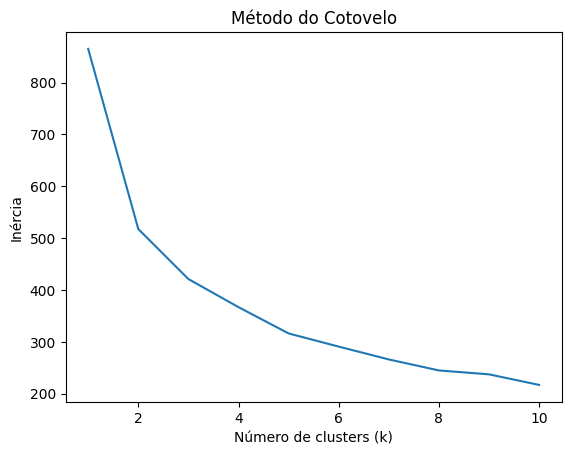

In [30]:
# Seleção de k (método do cotovelo):

print("Seleção de k (método do cotovelo)!!!")

# Lista para armazenar as inércias:
inercias = []

for k in range(1, 11): # Testa de 1 a 10 clusters
    kmeans = KMeans(n_clusters=k) # Instancia o modelo K-means
    kmeans.fit(dados) # Treina o modelo
    inercias.append(kmeans.inertia_) # Armazena a inércia

# Plotando o gráfico do método do cotovelo:
plt.plot(range(1, 11), inercias) 
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()



In [36]:
# Clusterizando os dados:
print("Clusterizando os dados")
kmeans = KMeans(n_clusters=k) # Instancia o modelo K-means
kmeans.fit(dados) # Treina o modelo
clusters = kmeans.labels_ # Recupera os clusters
dados['cluster'] = clusters # Adiciona a coluna 'cluster' ao dataframe

# Visualização dos clusters:
print("Visualização dos clusters!!!")
dados.head() # Exibe as 5 primeiras linhas do dataframe 'dados'




Clusterizando os dados
Visualização dos clusters!!!


,total_bill,tip,sex,time,size,weekend,cluster
0,-0.314066,-1.436993,0,1,2,1,0
1,-1.061054,-0.967217,1,1,3,1,0
2,0.137497,0.362610,1,1,3,1,4
3,0.437416,0.225291,1,1,2,1,5
4,0.539635,0.442111,0,1,4,1,3


In [ ]:
# ...

> Resolução:

...

## **Questão 4**

Considere a figura abaixo. Nela, tem-se uma tarefa de classificação, onde se busca prever a senioridade de um profissional de acordo com o salário

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/balanceamento-ilustracao.png?raw=true" width="75%"/>

Conforme observado, tem-se, nesse caso, duas classes:

- Profissional **pleno**: 0
- Profissional **sênior**: 1

Sabendo que cada ponto é um profissional no conjunto de dados e levando em conta o número de observações para cada classe, é interessante realizarmos uma re-amostragem, onde o foco é balancear o dataset em relação às classes. Diante disso, qual ténica de balanceamento foi utilizada neste caso: **oversampling** or **undersampling**?

> Resolução:

...

## **Questão 5**

Suponha que você está atuando em um projeto de dados onde o setor de marketing precisa estimar o investimento necessário para obter 600 cliques. Para isso, eles te forneceram dados históricos sobre campanhas passadas, conforme mostra o dicionário de dados abaixo:

| Coluna            | Descrição                                   |
|-------------------|---------------------------------------------|
| objetivo_campanha | objetivo da campanha de marketing           |
| visualizacoes     | total de visualizações obtidas nos anúncios |
| investimento_brl  | investimento em tráfego pago (em R$)        |
| cliques           | total de cliques obtidos nos anúncios       |


<br>

Utilize as colunas `cliques` e `investimento_brl` para treinar um modelo de regressão linear, onde  `cliques` será configurada como a variável preditora (**x**) e `investimento_brl` como variável resposta (**y**). Em outras palavras, deseja-se  estimar o investimento necessário (em R$) de acordo com a equação:

\begin{equation}
  \textrm{Investimento} = \beta_0 + \beta_1 \times \textrm{cliques}
\end{equation}

Premissas:

- O conjunto de dados não possui dados nulos/ausentes
- Não é preciso tratar os *outliers*
- Como só se tem apenas uma variável preditora (nas features), não é preciso normalizar os dados
- As campanhas são representativas para o problema de negócio que se quer resolver (estimar recursos financeiros para decidir a viabilidade da campanha).

Instruções:

1. Utilize qualquer algoritmo de regressão da sua escolha (`LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`, `KNeighborsRegressor`, `GaussianNB`, etc.)
2. Calcule o R² para os dados de teste
3. Visualize as variáveis preditora e resposta por meio de um gráfico de dispersão. Você pode usar o seguinte gráfico da biblioteca **Seaborn**:

```python
import seaborn as sns

sns.regplot(data=dados, x='VARIÁVEL PREDITORA', y='RESPOSTA')
```

* Dados

In [13]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/performance_campanhas_mkt.csv' -O 'performance_campanhas_mkt.csv'

* Bibliotecas

In [14]:
# Bibliotecas:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

> Resolução:

In [15]:
campanhas = pd.read_csv('performance_campanhas_mkt.csv')
campanhas.head()

,objetivo_campanha,visualizacoes,investimento_brl,cliques
0,reconhecimento da marca,3831,1399.040605,222
1,reconhecimento da marca,4483,1485.281189,97
2,venda de produtos,1548,992.997598,167
3,reconhecimento da marca,3625,1577.446638,242
4,venda de produtos,3155,1849.035475,373


In [16]:
# tamanho do dataset:
...

In [17]:
# tipo de dados:
...

In [18]:
# selecionar coluanas que serão utilizadas:
...

In [19]:
# features:
features = ...
# resposta:
resposta = ...

In [20]:
# dados de treino e teste:
...

In [21]:
# treino do modelo:
...

In [22]:
# predições (dados de teste):
...

# cálculo do R² (usando y_teste e predições para os dados de teste):
# exemplo: r2_score(y_test, pred_test)
...

In [23]:
# Visualização:
...

> Qual a estimativa de investimento necessário para atignir 600 cliques?

In [ ]:
cliques = ...
cliques = np.array(cliques).reshape(1, -1)

# predicação com base no número de cliques informado:
...

Estima-se um investimento de **R$ Y** para obter **600** cliques.